In [1]:
%matplotlib inline
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%load_ext google.colab.data_table
data = pd.read_json("/content/drive/MyDrive/G5 Inter-Promo 2021/Données/Input/Data.json")
print(len(data))
data.head(3)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table
12261


art_id                                        art_content  ... art_auth art_tag
0       0                                                     ...     None    None
1       1  La FNCDG et l’ANDCDG ont publié en septembre l...  ...     None    None
2       2  Malgré la levée des mesures de confinement le ...  ...     None    None

[3 rows x 13 columns]

In [8]:
data['art_tag'].describe()

count         10625
unique         1732
top       Not Found
freq           1055
Name: art_tag, dtype: object

In [9]:
raw_tags=data["art_tag"].values
tags=[]
set_of_tags = set()
for tag in raw_tags:
  if tag!=None:
    if tag[0]=='[':
      list_of_tags=eval(tag)
      for tag_in_list in list_of_tags:
        tags.append(tag_in_list)
for tag in tags:
  if tag!='' and tag!=None:
    tag=tag.lower()
    if tag[0]=='#':
      tag=tag[1:]
    set_of_tags.add(tag)
print(len(set_of_tags))
for i in set_of_tags:
  print(i)

1051
ville
sanitaire
climat
smart mobility
imagine angers
emploi - travail
opérateurs
institutions
orange business services
logement
tapis connecté
nautisme
technologie embarquée
collectivités locales
visioconférence
loi
festival
politique de l'énergie
expérience
stratups
a la une
etablissement scolaire
energie
tpe & auto-entrepreneurs
chaîne comptable
facteur
emploi
outre-mer
gestion publique
écosystème digital
jo paris 2024
base de données
photo
maddy keynote
greentech
collectivités territoriales
mers et océans
école
république démocratique du congo
droit européen
artisanat
epargne salariale
entreprise publique
droit international
avenir
saint valentin
malakoff médéric
espagne
télétravail
appel à projet
étudiants
navya
marine nationale
homme moderne
 tpe & auto-entrepreneurs
citoyens
mobiles
industrie culturelle
recherche
droit des sociétés
distinction
engie fab
personnalité politique
economie numérique
presse
eram
ouest medialab
immigration
chine
usages
laboratoire
assistance
wef
pr

In [10]:
%load_ext google.colab.data_table
df = pd.DataFrame({'art_id'	:data['art_id'], 
                            'art_tag':data['art_tag']})
df.head(10)

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


art_id art_tag
0       0    None
1       1    None
2       2    None
3       3    None
4       4    None
5       5    None
6       6    None
7       7    None
8       8    None
9       9    None

In [12]:
train_set = df[df['art_tag'].notnull()]
tags=train_set['art_tag']
for i,row in enumerate(tags):
  try :
    tags[i]=row.replace("#","").replace('[','').replace(']','')
  except:
    tags[i]=row.replace("#","")
  row="er"
train_set['art_tag']=tags
print(len(train_set))
train_set

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.use

10625


art_id                                            art_tag
74         74       'Evénement', 'Relation citoyens', 'Internet'
75         75       'Evénement', 'Relation citoyens', 'Internet'
76         76  'Evénement', 'Gestion eau', 'Mutualisation', '...
77         77  'Innover', 'Relation citoyens', 'Collaboratif'...
78         78                'Comptabilité', 'Dématérialisation'
...       ...                                                ...
11639   11639               ['Numérique', 'et', 'communication']
11640   11640                 ['Environnement', 'et', 'énergie']
11641   11641  ['Administration', 'et', 'ressources', 'humain...
11642   11642                      ['Habitat', 'et', 'logement']
11643   11643                 ['Environnement', 'et', 'énergie']

[10625 rows x 2 columns]

In [13]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train_set['art_tag'])
terms = vectorizer.get_feature_names()
print(vectorizer.vocabulary_)



{'evénement': 338, 'relation': 718, 'citoyens': 144, 'internet': 475, 'gestion': 399, 'eau': 277, 'mutualisation': 575, 'cloud': 154, 'innover': 461, 'collaboratif': 158, 'dématérialisation': 268, 'comptabilité': 173, 'anti': 44, 'virus': 904, 'sécurité': 823, 'messagerie': 552, 'communication': 171, 'finances': 367, 'intercommunalité': 471, 'services': 784, 'en': 295, 'ligne': 513, 'app': 46, 'mobile': 557, 'elus': 291, 'mobilité': 560, 'aménagement': 38, 'du': 256, 'territoire': 837, 'acteurs': 16, 'des': 229, 'territoires': 838, 'action': 17, 'logement': 522, 'permis': 651, 'de': 227, 'construire': 195, 'hiérarchie': 425, 'normes': 602, 'bâtiment': 113, 'politique': 664, 'la': 496, 'ville': 899, 'copropriété': 202, 'montagne': 566, 'collectivités': 165, 'locales': 517, 'hébergement': 434, 'urgence': 879, 'coeur': 157, 'travaux': 857, 'décentralisation': 260, 'habitat': 418, 'indigne': 449, 'aides': 32, 'financières': 369, 'maison': 539, 'au': 73, 'public': 700, 'msap': 571, 'rénovat

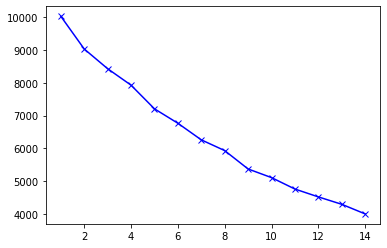

In [14]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [15]:
kmeans = KMeans(n_clusters= 11)
ymean = kmeans.fit_predict(X)
len(ymean)
ymean

array([5, 5, 5, ..., 7, 6, 6], dtype=int32)

In [16]:
%load_ext google.colab.data_table
df_labeled = pd.DataFrame({'art_id'	:train_set['art_id'], 
                            'art_tag':train_set['art_tag'],
                            'labels':ymean})
df_labeled

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


art_id                                            art_tag  labels
74         74       'Evénement', 'Relation citoyens', 'Internet'       5
75         75       'Evénement', 'Relation citoyens', 'Internet'       5
76         76  'Evénement', 'Gestion eau', 'Mutualisation', '...       5
77         77  'Innover', 'Relation citoyens', 'Collaboratif'...       5
78         78                'Comptabilité', 'Dématérialisation'       5
...       ...                                                ...     ...
11639   11639               ['Numérique', 'et', 'communication']       6
11640   11640                 ['Environnement', 'et', 'énergie']       6
11641   11641  ['Administration', 'et', 'ressources', 'humain...       7
11642   11642                      ['Habitat', 'et', 'logement']       6
11643   11643                 ['Environnement', 'et', 'énergie']       6

[10625 rows x 3 columns]

In [17]:
dict_classes = {
            'international': 0,
            'france': 1,
            'economie': 9,
            'numerique': 3,
            'transport': 4,
            'sports': 5,
            'sante': 6,
            'environement': 7,
            'education': 8,
            'securite': 9,
            'entreprise': 0,
            'legislation': 11
            }


In [18]:
mask = df['art_id'].isin(train_set['art_id'])
test_set = df[~mask]
len(test_set)

1636

In [19]:
len(train_set)

10625

In [20]:
ytrain = df_labeled['labels']
len(ytrain)

10625

In [21]:
xtrain = vectorizer.transform(train_set['art_tag'])

test_set.fillna("",inplace=True)
xtest = vectorizer.transform(test_set['art_tag'])

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
